<a href="https://colab.research.google.com/github/DL-WG/ROMS-tutorial/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with PCA: example
Wednesday 3rd March 2021

In [3]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

     |████████████████████████████████| 1.0MB 5.1MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-cp37-none-any.whl size=1100357 sha256=6dc5a7bde1bc11bac9c7ecf88919e14384db712c9b51f3fe71f58ffbcd4f4dd8
  Stored in directory: /root/.cache/pip/wheels/47/f8/64/72dfdafae89c380846799c1396957cddd04decf459242ea988
Successfully built eofs


In [4]:
#Load data
(Xtrain, ytrain), (Xtest, ytest) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 60000 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


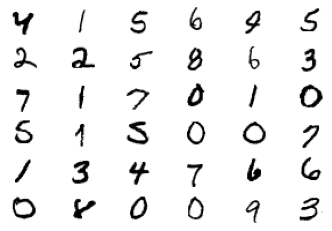

In [5]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.random_integers(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')


In [6]:
#Reshape data
modelData = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1]*Xtrain.shape[2]))


In [7]:
#Standardise data
meanData = np.mean(modelData, axis = 0)
stdData = np.std(modelData)
modelDataScaled = (modelData - meanData)/stdData


In [8]:
#PCA analysis

solver = Eof(modelDataScaled)

varianceCumulative = np.cumsum(solver.varianceFraction())
eigenvalues = solver.eigenvalues()
pcs = solver.pcs()
eof = solver.eofs()

Number of PCs for 86.4% variance is: 64


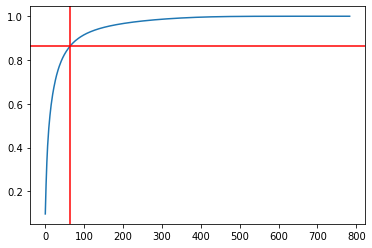

In [9]:
#set desired explained variance
targetVariance = 0.864

minPCs = np.min(np.where(varianceCumulative>targetVariance))
plt.plot(varianceCumulative)
plt.axvline(minPCs, color='r')
plt.axhline(targetVariance, color='r')
print('Number of PCs for ' + str(targetVariance*100) + '% variance is: ' + str(minPCs))

In [10]:
pcsTruncated = pcs[:, :minPCs]
eofsTruncated= eof[:minPCs, :]
reconTruncatedPCs = np.matmul(pcsTruncated, eofsTruncated)*stdData + meanData

In [11]:
#Reshape to full-space
reconModelData = np.reshape(reconTruncatedPCs, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

[ 7218 33559 47942 44522 47842 53467  1957 45710 30669 22253 33570 32165
 59142 49781 33566 22630 28968 11795 16214  8775 41997 30194 34326 37428
 40787 46234  5779 19652 31063  2442 13634 16131 58256 18657  9300 32562]


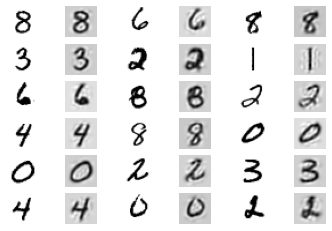

In [13]:
#Reconstruction comparison
randomIndex = np.random.randint(0, Xtrain.shape[0], 36)
print(randomIndex)
for i in range(18):
  plt.subplot(6, 6, 2*i + 1)
  plt.imshow(Xtrain[randomIndex[i], :, :], cmap = 'gray_r')
  plt.axis('off')
  plt.subplot(6, 6, 2*i + 2)
  plt.imshow(reconModelData[randomIndex[i], :, :], cmap = 'gray_r')
  plt.axis('off')